# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in TP2.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [2]:
import sqlite3

In [3]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [4]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
DonneesAdministrative:
  0: LIEU(TEXT)
  1: REGION(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
harvest:
  0: NP(NUM)
  1: NV(NUM)
  2: QTE(NUM)
producer:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
transac:
  0: NV(NUM)
  1: NB(NUM)
  2: QTE(NUM)
  3: LIEU(TEXT)
  4: DATES(NUM)
wine:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


Again, we will use **`%%sql`** magic for our queries

In [5]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [5]:
%%sql
DROP TABLE IF EXISTS wine;
DROP TABLE IF EXISTS producer;
DROP TABLE IF EXISTS harvest;

CREATE TABLE wine AS
SELECT DISTINCT NV,CRU,DEGRE,MILL
FROM MASTER1
WHERE NV IS NOT NULL;

CREATE TABLE producer AS
SELECT DISTINCT NP,NOM,PRENOM,REGION
FROM MASTER1
WHERE NP IS NOT NULL;


CREATE TABLE harvest AS
SELECT DISTINCT NP,NV,QTE
FROM MASTER1
WHERE NV and NP IS NOT NULL;


DROP TABLE IF EXISTS client;
DROP TABLE IF EXISTS transac;
DROP TABLE IF EXISTS DonneesAdministrative;

CREATE TABLE client AS
SELECT DISTINCT NB,NOM,PRENOM,TYPE
FROM MASTER2
WHERE NB IS NOT NULL;

CREATE TABLE transac AS
SELECT DISTINCT NV,NB,QTE,LIEU,DATES
FROM MASTER2
WHERE NV and NB is not null;

CREATE TABLE DonneesAdministrative AS 
SELECT DISTINCT LIEU,REGION
FROM MASTER2;


 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [6]:
%%sql
DROP VIEW IF EXISTS bons_buveurs;

CREATE VIEW bons_buveurs AS
SELECT NB,NOM,PRENOM,TYPE
FROM client
WHERE TYPE in ('moyen','gros');


 * sqlite:///wine.db
Done.
Done.


[]

In [7]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [8]:
%%sql
DROP VIEW IF EXISTS buveurs_asec;

CREATE VIEW buveurs_asec AS
SELECT NB,NOM,PRENOM,TYPE
FROM client
WHERE NB not in (SELECT NB FROM transac);

 * sqlite:///wine.db
Done.
Done.


[]

In [9]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [10]:
%%sql
DROP VIEW IF EXISTS buveurs_achats;

CREATE VIEW buveurs_achats AS
SELECT NB,NOM,PRENOM,TYPE
FROM client
WHERE NB not in (SELECT NB FROM buveurs_asec);

 * sqlite:///wine.db
Done.
Done.


[]

In [11]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [20]:
%%sql
DROP VIEW IF EXISTS q83pl;

CREATE VIEW q83pl AS
SELECT LIEU,CRU, sum(QTE) as QTE_BUE
FROM transac
    JOIN wine ON transac.NV = wine.NV
GROUP BY LIEU,CRU
HAVING DATES <=Datetime('1983-12-31') and DATES >= Datetime('1983-01-01')

;

 * sqlite:///wine.db
Done.
Done.


[]

In [21]:
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Pouilly Vinzelles,10
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


In [31]:
%%sql
DROP VIEW IF EXISTS q83pl;

CREATE VIEW q83pl AS
SELECT LIEU,CRU, sum(QTE) as QTE_BUE
FROM transac
    JOIN wine ON transac.NV = wine.NV
GROUP BY LIEU,CRU
HAVING DATES <=Datetime('1983-12-31') and DATES >= Datetime('1983-01-01')
ORDER BY QTE_BUE DESC
;

 * sqlite:///wine.db
Done.
Done.


[]

In [32]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80
LYON,Beaujolais Villages,10
PARIS,Pouilly Vinzelles,10
LILLE,Pommard,5
PARIS,Beaujolais Primeur,4
CAEN,Seyssel,3
LYON,Julienas,2
RENNES,Mercurey,1


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [39]:
%%sql 

DROP TABLE IF EXISTS RBB;
CREATE TABLE RBB AS 
SELECT * FROM bons_buveurs
ORDER BY NB
;

 * sqlite:///wine.db
Done.
Done.


[]

In [40]:
# Test
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [47]:
%%sql
SELECT client.NB,NOM,PRENOM,TYPE, sum(QTE) as total 
FROM client 
    JOIN transac ON transac.NB=client.NB
GROUP BY client.NB
HAVING total>100 AND type not in ('gros');


 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [49]:
%%sql 
UPDATE client
SET TYPE = 'gros'
WHERE NB in (SELECT client.NB 
        FROM client 
            JOIN transac ON transac.NB=client.NB
        GROUP BY client.NB
        HAVING sum(QTE)>100 AND type not in ('gros'));


 * sqlite:///wine.db
4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

In [54]:
%%sql 
SELECT * 
from bons_buveurs
except 
SELECT * 
from RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
5,Audiberti,Jacques,gros
9,Ajar,Emile,gros
44,Gide,Andre,gros


#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [55]:
%%sql 

DROP TABLE IF EXISTS RBA;
CREATE TABLE RBA AS 
SELECT * FROM buveurs_asec
ORDER BY NB
;

 * sqlite:///wine.db
Done.
Done.


[]

In [56]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [58]:
%%sql 

INSERT INTO RBA(NB, NOM, PRENOM,TYPE)
VALUES (101, 'Ferin', 'Kevin','moyen');

 * sqlite:///wine.db
1 rows affected.


[]

In [59]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

In [63]:
%%sql 
SELECT * 
from RBA
except
SELECT * 
from buveurs_asec
;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
101,Ferin,Kevin,moyen


___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

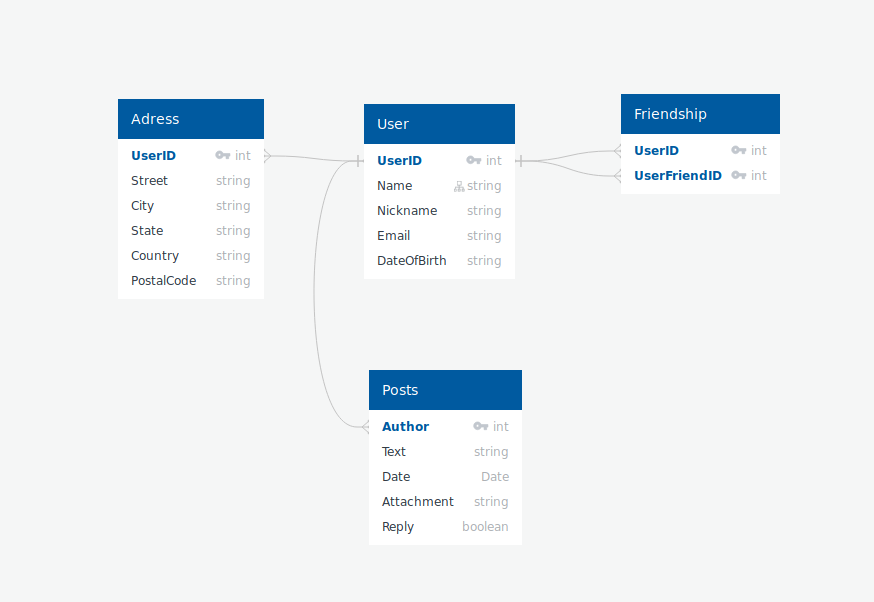

In [14]:
from IPython.display import Image
Image(filename="Schema TP 3 part 3.png")


#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

In [86]:
%%sql 
DROP TABLE IF EXISTS ADRESSE; 
DROP TABLE IF EXISTS USER;
DROP TABLE IF EXISTS FRIENDSHIP;
DROP TABLE IF EXISTS POSTS;
CREATE TABLE ADRESSE (
    UserID int PRIMARY KEY,
    Street str,
    City str,
    State str,
    Country str,
    PostalCode int 
    );
CREATE TABLE USER (
    ID int PRIMARY KEY,
    Name str,
    Nickname str,
    Email str,
    DateOfBirth Date
    );
CREATE TABLE FRIENDSHIP (
    UserID int,
    UserFriendID int,
    PRIMARY KEY (UserID,UserFriendID)
    );
CREATE TABLE POSTS (
    Author int,
    Text str,
    Date Date,
    Attachment str,
    Reply bool
    );

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [87]:
%%sql 
INSERT INTO USER (Id,Name,Nickname,Email,DateOfBirth)
VALUES 
    (001, "François Portier", "fportier", "francois.portier@telecom-paristech.fr", "23/02/1978"),
    (002, "Anne Sabourin", "asabourin", "anne.sabourin@telecom-paristech.fr", "03/09/1974"),
    (003, "Jeremie Peres", "jperes", "jeremie.peres@telecom-paristech.fr", "05/08/1994"),
    (004, "Kevin Ferin", "kferin", "kevin.ferin@telecom-paristech.fr", "10/11/1995"),
    (005, "Paul Legououx", "plegououx", "paul.legououx@telecom-paristech.fr", "29/12/1995"),
    (006, "Nicolas Louis", "nlouis", "nicolas.louis@telecom-paristech.fr", "01/01/1980");
    
INSERT INTO ADRESSE (UserId,Street,City,State,Country,PostalCode)
VALUES 
    (001, "Rue Vaugirard", "Paris", "IDF", "France",75001),
    (002, "Rue Barbès", "Paris", "IDF", "France", 75018),
    (003, "Rue Bagnolet", "Paris", "IDF", "France", 75020),
    (004, "Bd Sebastopol", "Paris", "IDF", "France", 75001),
    (005, "Bd Haussman", "Paris", "IDF", "France", 75014),
    (006, "Avenue Champs Elysées", "Paris", "IDF", "France", 75006);
    
    
INSERT INTO FRIENDSHIP (UserId,UserFriendID)
VALUES 
    (001,002),
    (002,001),
    (001,003),
    (003,001),
    (003,004),
    (004,003),
    (004,005),
    (005,004),
    (003,005),
    (005,003),
    (004,006),
    (006,004);
    
INSERT INTO POSTS (Author,text,date,attachment,reply)
VALUES 
    (001, "Enfin la rentrée !!", "2019-11-04", "", False),
    (001, "Oh non trop nul les vacances", "2019-10-24", "", False),
    (002, "Trop d'accord avec toi !", "2019-10-24", "", True),
    (006, "Je suis représentant du MS BigData", "2019-10-03", "", False),
    (003, "Felicitation", "2019-10-03", "", True),
    (004, "Felicitation !", "2019-10-03", "", True),
    (005, "Felicitation !!", "2019-10-03", "", True),
    (004, "Admis au MS Big Data", "2019-09-02", "", False),
    (005, "C'est la rentrée", "2019-09-09", "", False),
    (003, "Trop bon restaurant ce midi", "2019-10-28", "", False);


 * sqlite:///wine.db
6 rows affected.
6 rows affected.
12 rows affected.
10 rows affected.


[]

In [88]:
%%sql 
DROP VIEW IF EXISTS POSTSTOPRINT;
CREATE VIEW POSTSTOPRINT AS 

SELECT author, Name, text,date, reply FROM POSTS 
    JOIN FRIENDSHIP ON posts.author=friendship.userfriendid
    JOIN USER ON user.id=friendship.userfriendid
WHERE UserId=004
ORDER BY Date desc
LIMIT 5;

 * sqlite:///wine.db
Done.
Done.


[]

In [89]:
%%sql
select * from poststoprint;

 * sqlite:///wine.db
Done.


Author,Name,Text,Date,Reply
3,Jeremie Peres,Trop bon restaurant ce midi,2019-10-28,0
3,Jeremie Peres,Felicitation,2019-10-03,1
5,Paul Legououx,Felicitation !!,2019-10-03,1
6,Nicolas Louis,Je suis représentant du MS BigData,2019-10-03,0
5,Paul Legououx,C'est la rentrée,2019-09-09,0
